### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)
# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers.
reviews2 = reviews.rename(columns={"remuneration (k£)": "remuneration", "spending_score (1-100)": "spending_score"})

In [9]:
reviews2

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews2.to_csv('reviews_cleaned.csv')


In [11]:
# Import new CSV file with Pandas.
reviews2 = pd.read_csv('reviews_cleaned.csv')
reviews2

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression using OLS

### 5a) spending vs loyalty

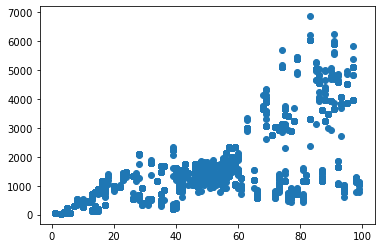

In [12]:
# Define the dependent variable.
y = reviews2['loyalty_points'].tolist()

# Define the independent variable.
x = reviews2['spending_score'].tolist()

# Check for linearity with PLT
plt.scatter(x, y)

In [13]:
# Fit the OLS model
# Create formula and pass through OLS methods.
f = 'y ~ x'
model1 = ols(f, data = reviews2).fit()

# Print the regression table.
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        14:16:08   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print("Parameters: ", model1.params)  

# Extract the standard errors.
print("Standard errors: ", model1.bse)  

# Extract the predicted values.
print("Predicted values: ", model1.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (model1.params["Intercept"]) + model1.params["x"] * reviews2['spending_score']

# View the output.
y_pred

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

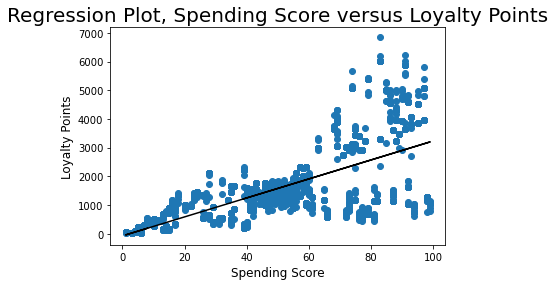

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the labels.
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.title('Regression Plot, Spending Score versus Loyalty Points', fontsize=20)

# View the plot.
plt.show()
plt.savefig("regression_OLS_spend_final")

### 5b) remuneration vs loyalty

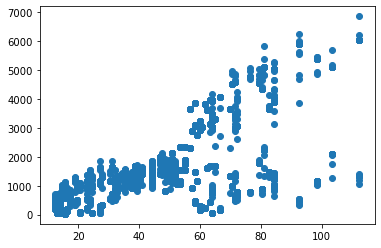

In [17]:
# Define the dependent variable.
y = reviews2['loyalty_points'].tolist()

# Define the independent variable.
x = reviews2['remuneration'].tolist()

# Check for linearity with PLT
plt.scatter(x, y)

In [18]:
# Fit the OLS model
# Create formula and pass through OLS methods.
f = 'y ~ x'
model2 = ols(f, data = reviews2).fit()

# Print the regression table.
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        14:16:08   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", model2.params)  

# Extract the standard errors.
print("Standard errors: ", model2.bse)  

# Extract the predicted values.
print("Predicted values: ", model2.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred2 = (model2.params["Intercept"]) + model2.params["x"] * reviews2['remuneration']

# View the output.
y_pred2

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Name: remuneration, Length: 2000, dtype: float64

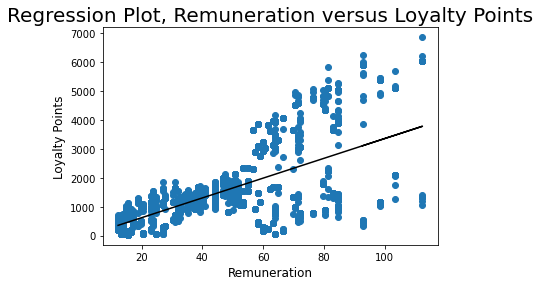

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred2, color='black')

# Set the labels.
plt.xlabel('Remuneration', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.title('Regression Plot, Remuneration versus Loyalty Points', fontsize=20)

# View the plot.
plt.show()
plt.savefig("OLS_rem_loyalty_final")

### 5c) age vs loyalty

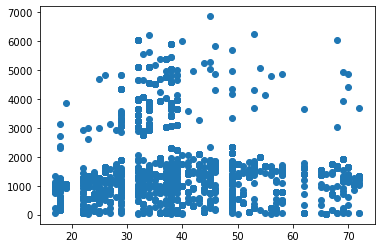

In [22]:
# Define the dependent variable.
y = reviews2['loyalty_points'].tolist()

# Define the independent variable.
x = reviews2['age'].tolist()

# Check for linearity with PLT
plt.scatter(x, y)

In [23]:
# Fit the OLS model
# Create formula and pass through OLS methods.
f = 'y ~ x'
model_age = ols(f, data = reviews2).fit()

# Print the regression table.
model_age.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0577
Time:                        14:16:08   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print("Parameters: ", model_age.params)  

# Extract the standard errors.
print("Standard errors: ", model_age.bse)  

# Extract the predicted values.
print("Predicted values: ", model_age.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [25]:
# Set the X coefficient and the constant to generate the regression table.
y_pred3 = (model_age.params["Intercept"]) + model_age.params["x"] * reviews2['age']

# View the output.
y_pred3


0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Name: age, Length: 2000, dtype: float64

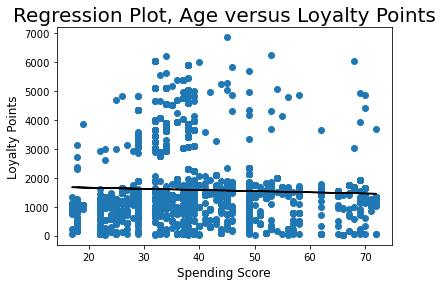

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred3, color='black')

# Set the labels.
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.title('Regression Plot, Age versus Loyalty Points', fontsize=20)

# View the plot.
plt.show()
plt.savefig("regression_ols_age_final")

## 6. Observations and insights

***Your observations here...***






There is a slight positive correlation between spending score and loyalty points, and between remuneration and loyalty. The relationship between age and loyalty points is inconclusive, with an almost-zero R-squared value. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [27]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load the CSV file(s) as df2.
df = pd.read_csv('reviews_cleaned.csv')
df2 = df[['remuneration', 'spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [29]:
# Explore the data.
df2.info()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


remuneration      0
spending_score    0
dtype: int64

In [30]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

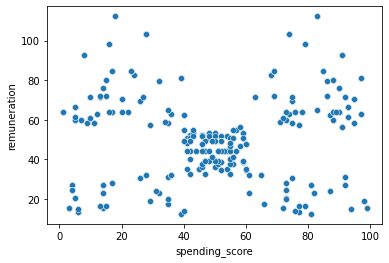

In [31]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=df2)
plt.savefig("Rem_V_Spending_Scatter")

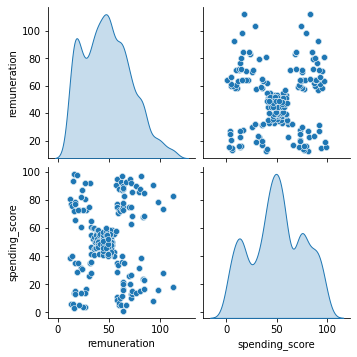

In [32]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')
plt.savefig("Rem_V_Spending_Pair")

## 3. Elbow and silhoutte methods

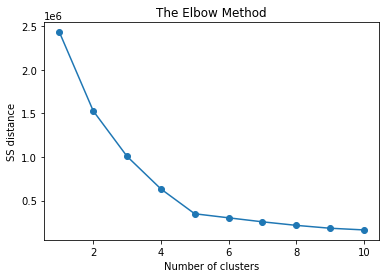

In [33]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

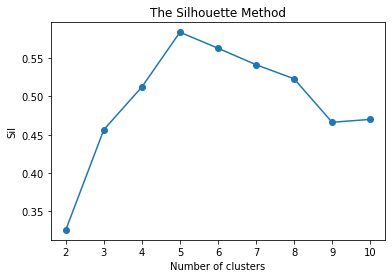

In [34]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

### 4a. Evaluating the model where K=4

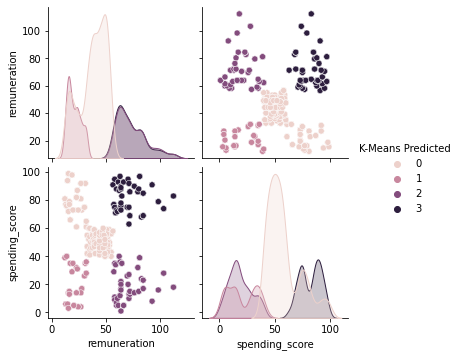

In [35]:
# Use four clusters.
kmeans = KMeans(n_clusters=4,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, 
             hue='K-Means Predicted',
             diag_kind='kde')

In [36]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [37]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

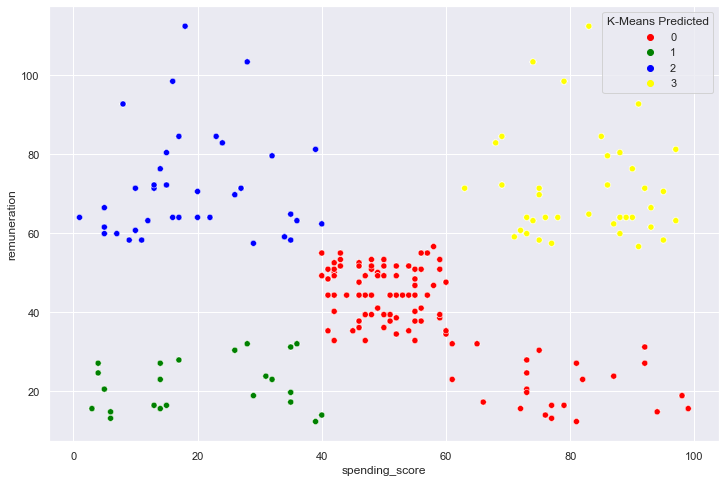

In [38]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow'])

### 4b. Evaluating the model where K=5

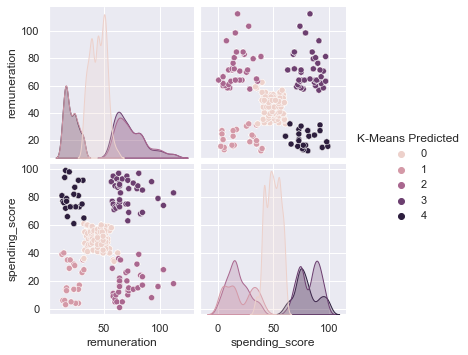

In [39]:
# Use five clusters.
kmeans = KMeans(n_clusters=5,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, 
             hue='K-Means Predicted',
             diag_kind='kde')

plt.savefig("clustering_model_pairplot")

In [40]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [41]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


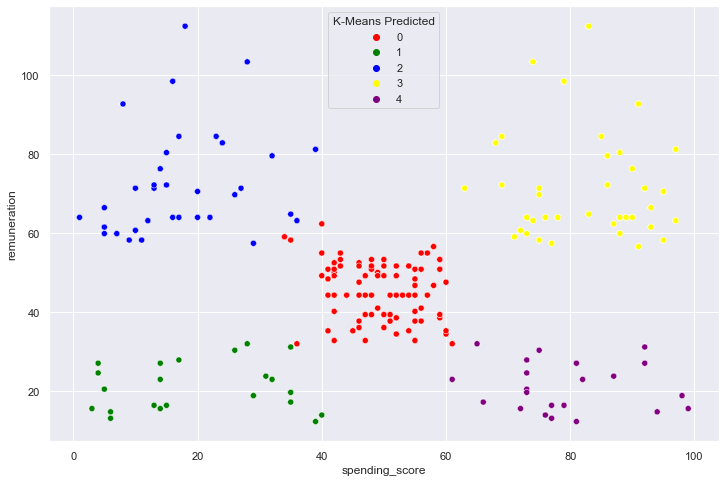

In [42]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'purple'])

plt.savefig("clustering_model_scatterplot")

## 5. Discuss: Insights and observations

Given the distribution of the data when observed in the pairplot and scatterplot, there was a significant bias in the data towards 5 clusters, as reflected in the high silhouette test value.
Using 5 clusters effectively groups the data in such a way that the datapoints in the same groups are more similar to each other than the data points in other groups. From this, we can infer that there is a strong and distinctive relationship between remuneration and a specific spending score.  
The modal remuneration was 100,000 (100 value and K=1000) and modal spending score is 50. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [43]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the data set as df3.
df = pd.read_csv('reviews_cleaned.csv')
df3 = df[['review', 'summary']]
# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [45]:
# Explore data set.
df3.info()

# Determine if there are any missing values.
df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


review     0
summary    0
dtype: int64

In [46]:
# Drop the empty rows.
df3.dropna(subset=['review'], inplace=True)
# Preview
df3.shape

(2000, 2)

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [47]:
# Transform review data to lowercase.
# df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3["review"] = df3["review"].str.lower()
# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [48]:
# Transform  summary data to lowercase.
# df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3["summary"] = df3["summary"].str.lower()
# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [49]:
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [50]:
# Remove punctuation in review.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9\n\nyour unpainted...
2    nice art nice printing  why two panels are fil...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [51]:
# Remove punctuation in summary.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [52]:
# Check duplicates in review column.
df3.review.duplicated().sum()

50

In [53]:
# Drop duplicates.
review = df3.drop_duplicates(subset=['review'])

# Preview data.
review.reset_index(inplace=True)
review.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [54]:
# Check for duplicates in summary column.
df3.summary.duplicated().sum()

649

In [55]:
# Drop duplicates.
summary = df3.drop_duplicates(subset=['summary'])

# Preview data.
summary.reset_index(inplace=True)
summary.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

### 3a) Reviews wordcloud

In [56]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_review = ''
for i in range(review.shape[0]):
    # Add each comment.
    all_review = all_review + review['review'][i]

In [58]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

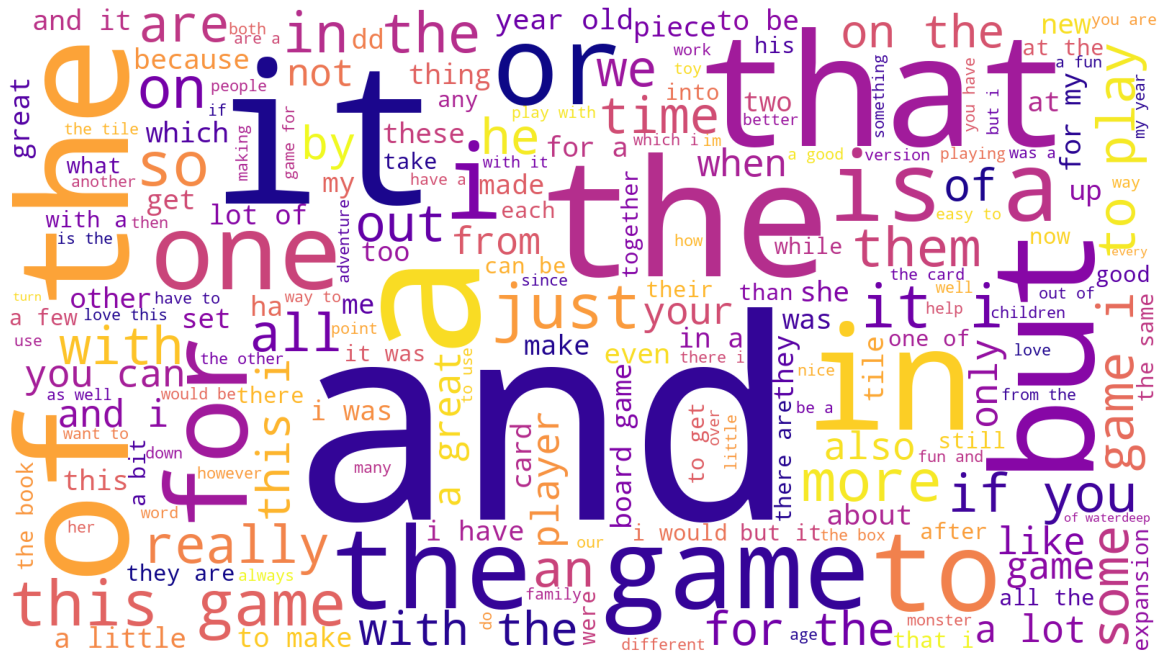

In [59]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 3b) Summary wordcloud

In [60]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(summary.shape[0]):
    # Add each comment.
    all_summary = all_summary + summary['summary'][i]

In [61]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

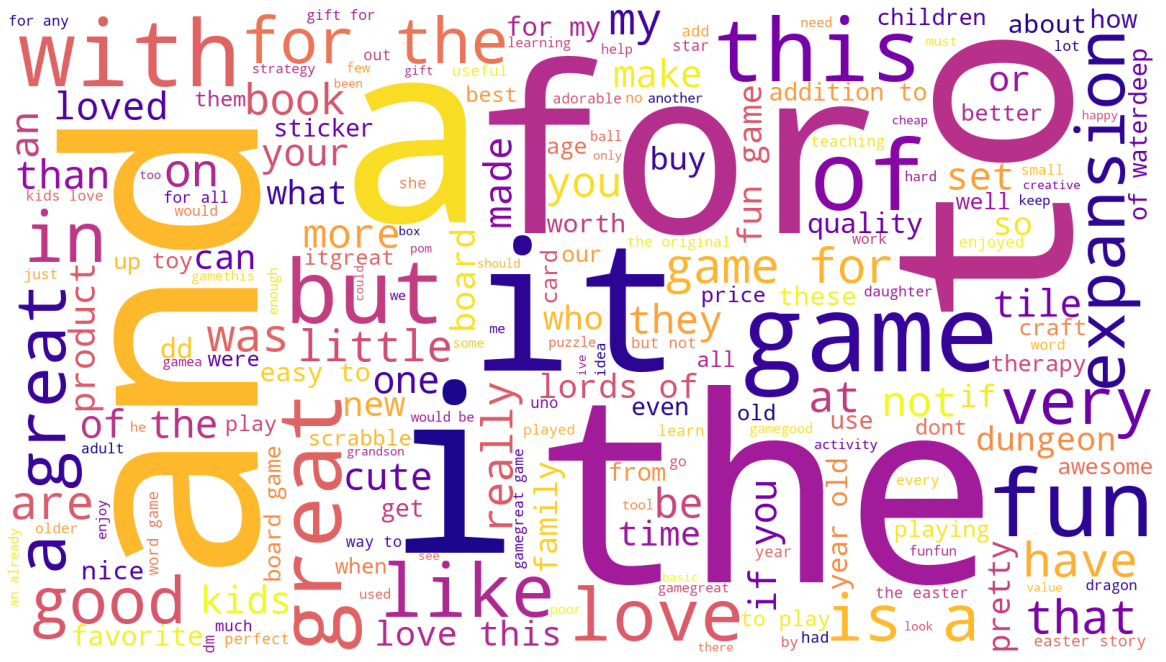

In [62]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution for review

In [63]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/coreyboisvert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
# Tokenise the review words.
review['tokens'] = review['review'].apply(word_tokenize)

# Preview data.
review['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [65]:
# Define an empty list of tokens.
review_tokens = []

for i in range(review.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + review['tokens'][i]

In [66]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(review_tokens)

# Preview data.
fdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

### 4b) Frequency distribution for summary

In [67]:
# Tokenise the review words.
summary['tokens'] = summary['summary'].apply(word_tokenize)

# Preview data.
summary['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [68]:
# Define an empty list of tokens.
summary_tokens = []

for i in range(summary.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + summary['tokens'][i]

In [69]:
# Calculate the frequency distribution.
fdist = FreqDist(summary_tokens)

# Preview data.
fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4c) Remove alphanumeric characters

In [70]:
# Delete all the alpanum in reviews.
tokens2_review = [word for word in review_tokens if word.isalnum()]

In [71]:
# Delete all the alpanum in summary.
tokens2_summary = [word for word in summary_tokens if word.isalnum()]

### 4d) Remove stopwords

In [72]:
# Download the stop word list.
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/coreyboisvert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words for review.
tokens2_review = [x for x in tokens2_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2_review:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

In [74]:
# Create a filtered list of tokens without stop words for summary.
tokens2_summary = [x for x in tokens2_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_strings = ''

for value in tokens2_summary:
    # Add each filtered token word to the string.
    tokens2_strings = tokens2_strings + value + ' '

### 4c) Create wordcloud without stopwords

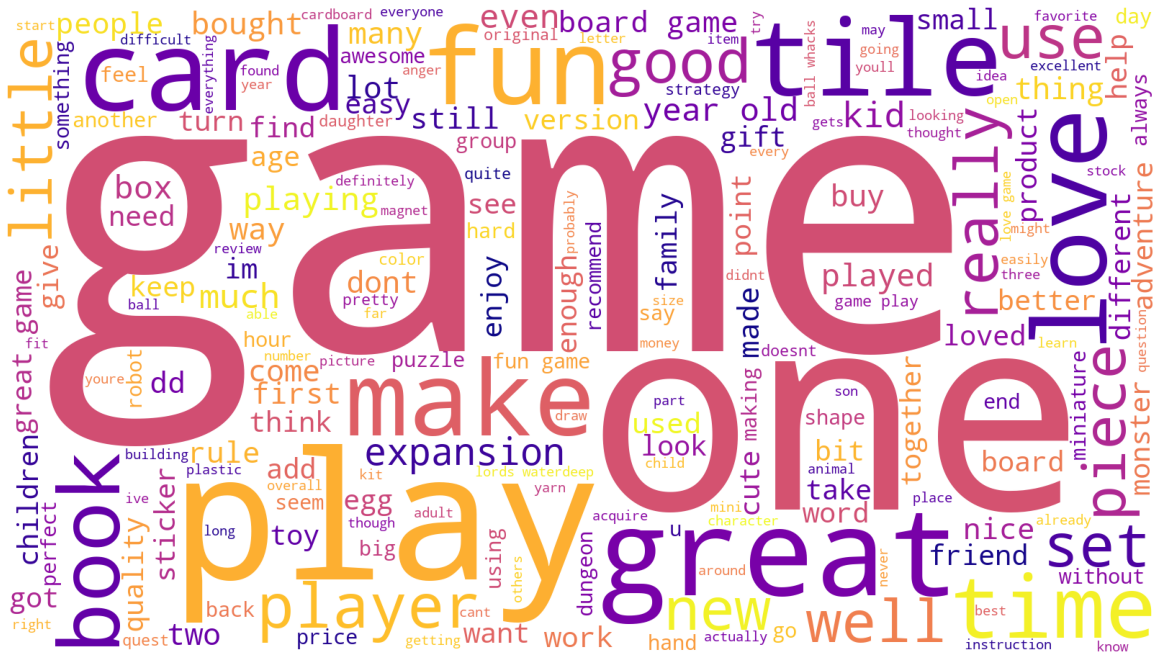

<Figure size 864x576 with 0 Axes>

In [75]:
# Create a WordCloud for Reviews without Stopwords.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
plt.savefig("wordcloud_review")

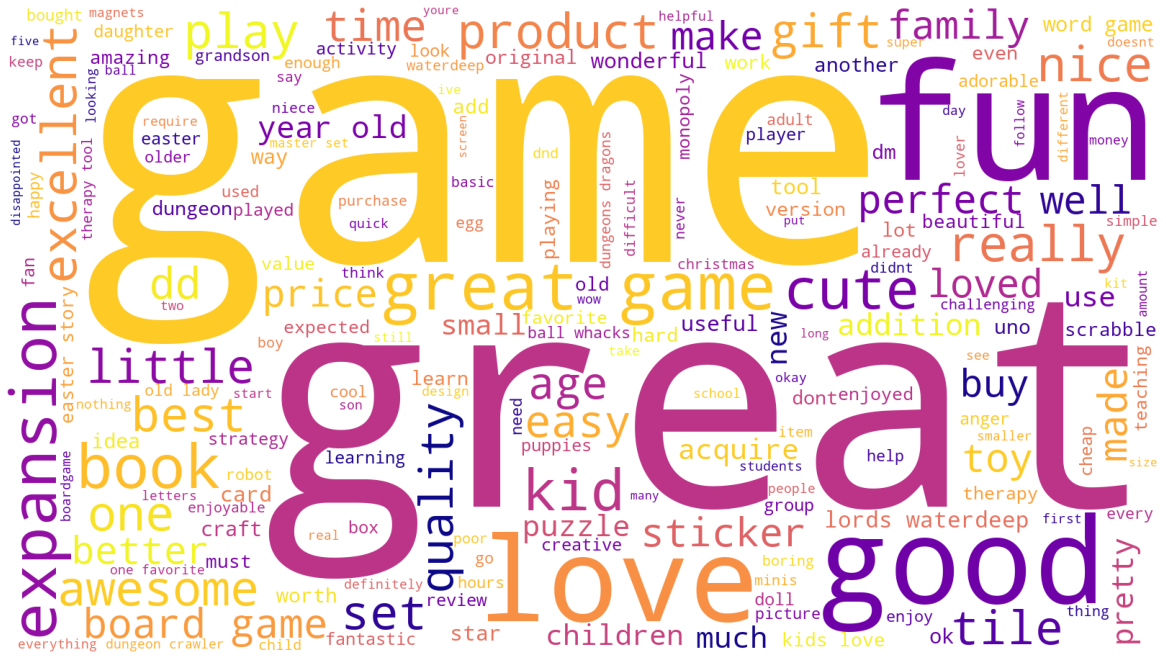

<Figure size 864x576 with 0 Axes>

In [76]:
# Create a WordCloud for Summary without Stopwords.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_strings) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
plt.savefig("wordcloud_summary")

### 4d) Identify 15 most common words and polarity

In [77]:
# Determine the 15 most common words for review.
fdist1 = FreqDist(tokens2_review)

# Preview the data.
fdist1

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [78]:
# Determine the 15 most common words for summary.
fdist2 = FreqDist(tokens2_summary)

# Preview the data.
fdist2

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [79]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each review.
review['polarity'] = review['review'].apply(generate_polarity)

# Preview the result.
review['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [80]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each summary.
summary['polarity'] = summary['summary'].apply(generate_polarity)

# Preview the summary.
summary['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

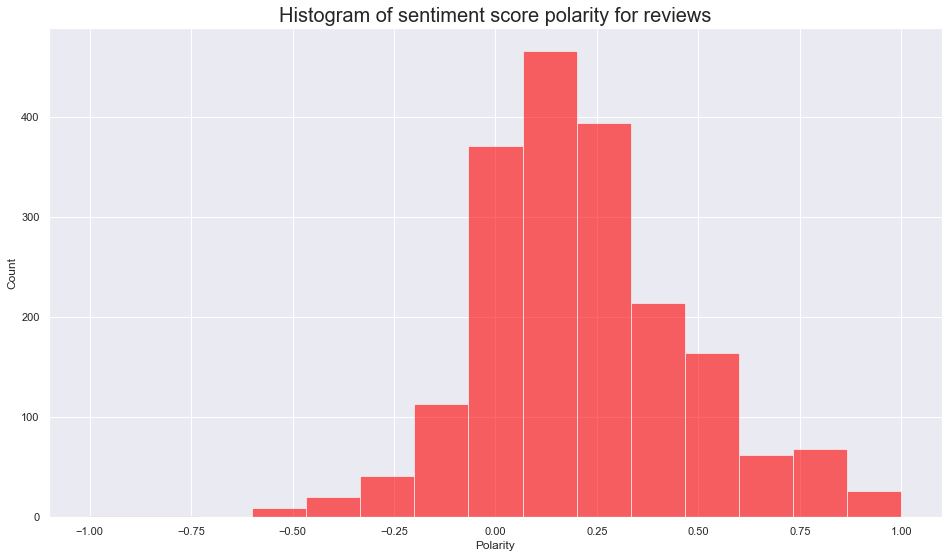

<Figure size 864x576 with 0 Axes>

In [81]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)

plt.show()
plt.savefig("hist_polarity_reviews")

In [82]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
review['subjectivity'] = review['review'].apply(generate_subjectivity)

# Preview the result.
review['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

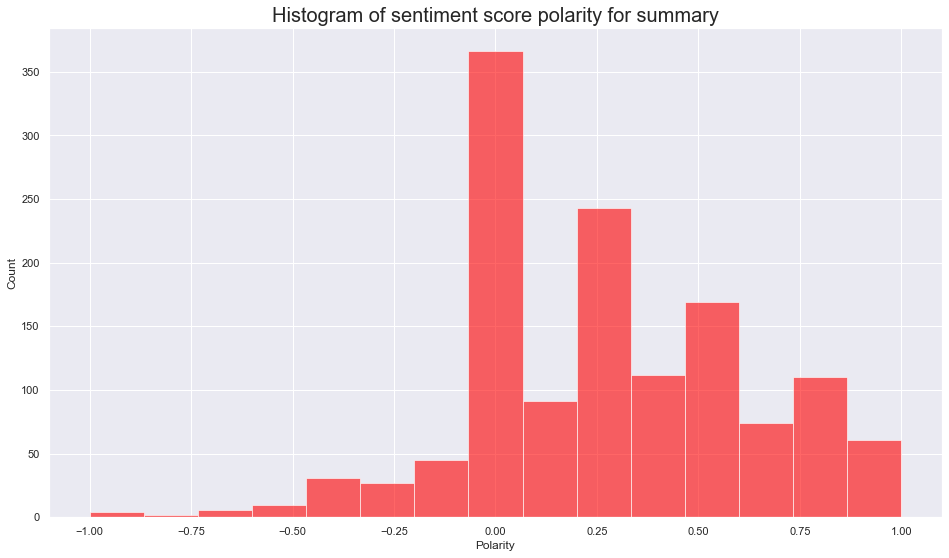

<Figure size 864x576 with 0 Axes>

In [83]:
# Reviews: Create a histogram of polarity score for summary with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(summary['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary', fontsize=20)

plt.show()
plt.savefig("hist_polarity_summary")

# Histogram of subjectivity score


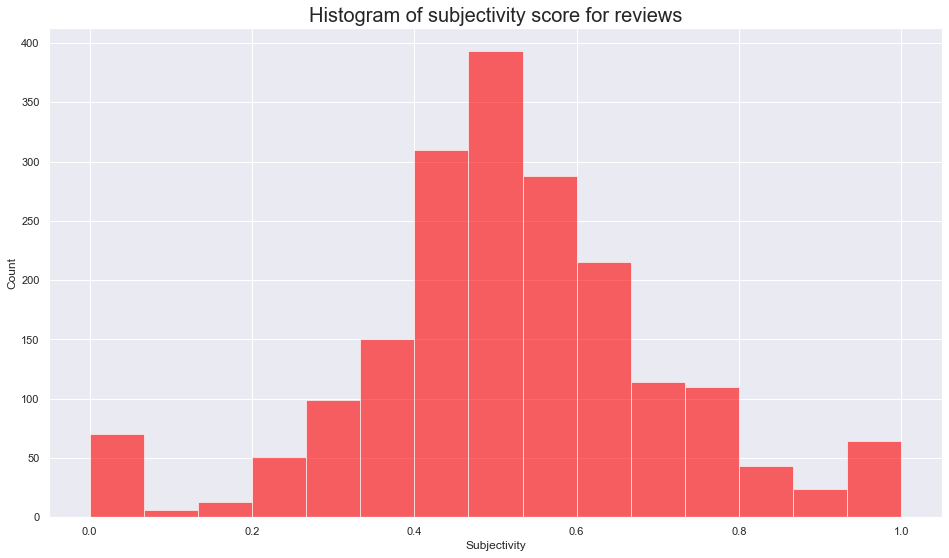

<Figure size 864x576 with 0 Axes>

In [84]:
# histogram of subjectivity score for reviews
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review['subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score for reviews', fontsize=20)

plt.show()
plt.savefig("hist_subject_review")

In [85]:
# Define a function to extract a subjectivity score for the summary.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each summary.
summary['subjectivity'] = summary['summary'].apply(generate_subjectivity)

# Preview the result.
summary['subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity, dtype: float64

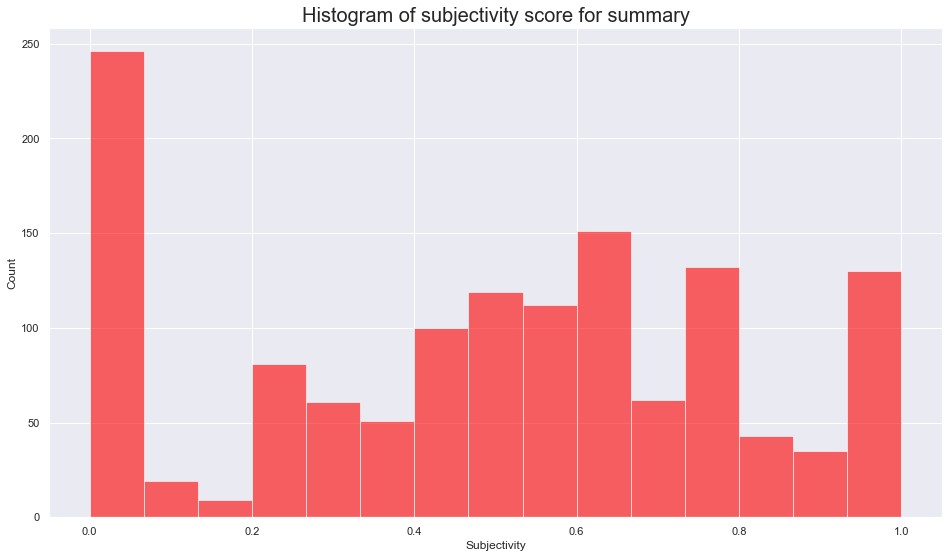

<Figure size 864x576 with 0 Axes>

In [86]:
# histogram of subjectivity score for summary
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(summary['subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score for summary', fontsize=20)

plt.show()
plt.savefig("hist_subject_summary")

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [87]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment_review = review.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['polarity', 'subjectivity', 'review']]

# Adjust the column width.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
positive_sentiment_review

,polarity,subjectivity,review
7,1.0,1.0,came in perfect condition
164,1.0,1.0,awesome book
193,1.0,1.0,awesome gift
489,1.0,1.0,excellent activity for teaching selfmanagement...
517,1.0,1.0,perfect just what i ordered
583,1.0,1.0,wonderful product
601,1.0,1.0,delightful product
613,1.0,1.0,wonderful for my grandson to learn the resurre...
782,1.0,1.0,perfect
922,1.0,1.0,awesome


In [88]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_review = review.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['polarity', 'subjectivity', 'review']]

# Adjust the column width.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '2400px'})

# View output.
negative_sentiment_review

,polarity,subjectivity,review
207,-1.000000,1.000000,booo unles you are patient know how to measur...
181,-0.780000,0.910000,incomplete kit very disappointing
1766,-0.583333,0.750000,im sorry i just find this product to be boring...
362,-0.550000,0.300000,one of my staff will be using this game soon s...
116,-0.500000,0.900000,i bought this as a christmas gift for my grand...
226,-0.500000,1.000000,this was a gift for my daughter i found it di...
229,-0.500000,1.000000,i found the directions difficult
289,-0.500000,1.000000,instructions are complicated to follow
300,-0.500000,1.000000,difficult
1496,-0.500000,0.700000,expensive for what you get


In [89]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment_summary = summary.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['polarity', 'subjectivity', 'summary']]

# Adjust the column width.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '2400px'})

# View output.
positive_sentiment_summary

,polarity,subjectivity,summary
5,1.0,0.3,best gm screen ever
23,1.0,1.0,wonderful designs
27,1.0,1.0,perfect
61,1.0,1.0,theyre the perfect size to keep in the car or ...
107,1.0,1.0,perfect for preschooler
112,1.0,1.0,awesome sticker activity for the price
132,1.0,1.0,awesome book
133,1.0,1.0,he was very happy with his gift
150,1.0,1.0,awesome
166,1.0,1.0,awesome and welldesigned for 9 year olds


In [90]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_summary = summary.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['polarity', 'subjectivity', 'summary']]

# Adjust the column width.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '2400px'})

# View output.
negative_sentiment_summary

,polarity,subjectivity,summary
17,-1.000000,1.000000,the worst value ive ever seen
165,-1.000000,1.000000,boring unless you are a craft person which i am
588,-1.000000,1.000000,boring
838,-0.900000,0.700000,before this i hated running any rpg campaign d...
1,-0.800000,0.900000,another worthless dungeon masters screen from ...
116,-0.750000,0.750000,disappointed
266,-0.700000,0.200000,promotes anger instead of teaching calming met...
635,-0.700000,0.666667,too bad this is not what i was expecting
638,-0.700000,0.666667,bad qualityall made of paper
144,-0.650000,1.000000,at age 31 i found these very difficult to make


## 7. Discuss: Insights and observations

***Your observations here...***

The reviews and summaries left in the CSV file show a fascinating balance between high opinionation and high subjectivity. There is a strong relationship between the sentiment score and the subjectivity score, implying that those who left a review were largely roused by personal feelings. 
Reviews and summaries were more likely to be positive than negative, it is clear that those who feel positive about their products feel it to a greater degree than those who feel negatively. But there is a high level of subjectivity.
When compared with the clustering ML model implemented earlier in the course, this fits the running trend that consumers fit into strong archetypes, which could be used to segment product offering and promotional materials. 

# 